<a href="https://colab.research.google.com/github/dariabokareva/datascience/blob/master/neural-networks/fashion_mnist_dense_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание предметов одежды с помощью Keras

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential # последовательные слои
from tensorflow.keras.layers import Dense, Dropout # полносвязная nn
from tensorflow.keras import utils # приведение данных в подходящий формат
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Подготовка данных для обучения сети

In [ ]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [ ]:
# Названия классов
classes = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто',
           'Туфли', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинки']

Просмотр примеров изображений

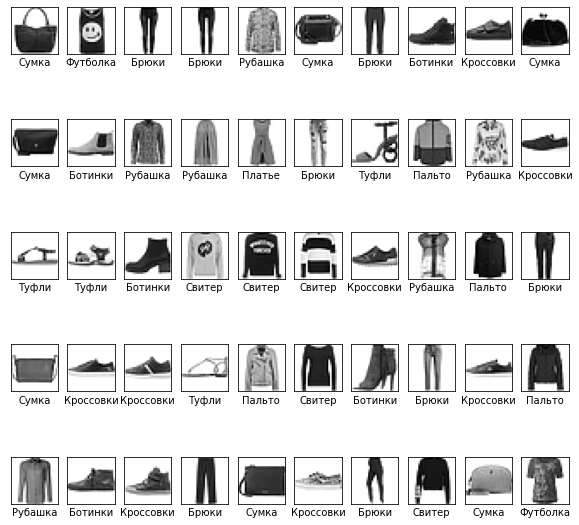

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [ ]:
# Преобразование размерности изборажений в плоский вектор
x_train = x_train.reshape(60000, 784) 

# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255

**Преобразуем метки в формат one hot 
encoding**

In [ ]:
# Преобразование меток в категории
y_train = utils.to_categorical(y_train, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

**ReLu** - Rectified Linear Unit
* f(x) = max(0,x)

**SoftMax** - нормализованная экспоненциальная функция
* Используется для представления вероятности
* Сумма всех выхожных значений нейронов равна 1

In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление уровней сети
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству категорий одежды)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
# Компиляция модели
model.compile(loss="categorical_crossentropy", # категориальная перекрестная энтропия
              optimizer="rmsprop", metrics=["accuracy"]) #optimizer="SGD" - стохастический градиентный спуск

print(model.summary())

# Обучаем нейронную сеть

In [ ]:
# Обучаем сеть
model.fit(x_train,
          y_train,
          batch_size=200, # мини-выборка
          epochs=100,
          verbose=1)

Epoch 1/100
300/300 [==============================] - 7s 19ms/step - loss: 0.6167 - accuracy: 0.7853
Epoch 2/100
300/300 [==============================] - 6s 19ms/step - loss: 0.3979 - accuracy: 0.8540
Epoch 3/100
300/300 [==============================] - 6s 19ms/step - loss: 0.3461 - accuracy: 0.8720
Epoch 4/100
300/300 [==============================] - 6s 19ms/step - loss: 0.3156 - accuracy: 0.8827
Epoch 5/100
300/300 [==============================] - 6s 19ms/step - loss: 0.2949 - accuracy: 0.8899
Epoch 6/100
300/300 [==============================] - 6s 20ms/step - loss: 0.2794 - accuracy: 0.8969
Epoch 7/100
300/300 [==============================] - 6s 19ms/step - loss: 0.2653 - accuracy: 0.9012
Epoch 8/100
300/300 [==============================] - 6s 20ms/step - loss: 0.2537 - accuracy: 0.9050
Epoch 9/100
300/300 [==============================] - 6s 21ms/step - loss: 0.2417 - accuracy: 0.9096
Epoch 10/100
300/300 [==============================] - 6s 19ms/step - loss: 0.233

# Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [ ]:
# Запуск модели на входных данных
predictions = model.predict(x_train)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.2507751e-25 3.0350455e-36 4.4532914e-25 1.3198846e-33 1.0000000e+00]


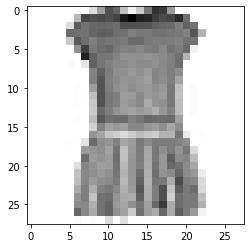

In [ ]:
n = 3
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

In [ ]:
print(predictions[n])

[1.5595211e-05 5.1466852e-19 1.5037316e-25 9.9998438e-01 6.1454150e-33
 8.1244740e-33 1.9937726e-08 1.0363413e-32 1.9609944e-27 1.4976393e-34]


Определяем номер класса изображения, который предлагает сеть

In [ ]:
result = np.argmax(predictions[n])
print(classes[result])

Платье


**Запускаем распознавание на тестовом наборе данных**

In [ ]:
x_test = x_test.reshape(10000, 784)
x_test = x_test / 255

In [ ]:
y_test = utils.to_categorical(y_test, 10)

In [ ]:
# Запуск модели на входных данных
predictions = model.predict(x_test)

print(predictions[0])

[6.4461144e-34 0.0000000e+00 6.3329386e-37 0.0000000e+00 7.8507167e-36
 1.5750815e-16 2.4220256e-25 2.1118142e-22 4.2374055e-29 1.0000000e+00]


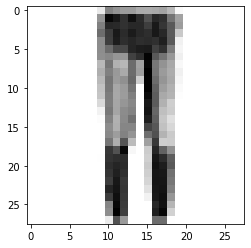

In [ ]:
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
result = np.argmax(predictions[n])
print(classes[result])

Брюки


# Оценка качества обучения сети на тестовых данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 1.0722 - accuracy: 0.8904


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1]*100, 4))

Доля верных ответов на тестовых данных, в процентах: 89.04
